# GROUP 8 COMPUTER VISION  FINAL PROJECT


-BRIGHT OFORI 

-ANTHONY VARBARO

## OBJECT TRACKING USING MEAN SHIFT,CSRT and DEEPSORT IN DIFFERENT SCENARIOS

- Moving camera with static object

- Moving camera with moving object

- Static camera with moving object

- Try with varying object velocity. You can skip frame to try vary the speed.

OUTLINE

For each tracking algorithm, different scenarios are applied and results discussed.

# MEAN SHIFT ALGORITHM

Mean Shift is a non-parametric clustering algorithm commonly used for object tracking. It works by iteratively shifting a window in the feature space towards the mode (peak) of the distribution, until convergence. In object tracking, it can be used to track the position of an object in successive frames.

**Step-by-Step Explanation:**

-Initialization: Initialize the tracker with the location of the object in the first frame.

-Feature Extraction: Extract features from the region of interest (ROI) around the object, including color features and spatial information.

-Model Training: Train the CSRT model using the extracted features to learn the appearance and spatial information of the object.

-Object Localization: Use the trained model to localize the object in subsequent frames by predicting its position.

-Update Tracker: Update the tracker with the new location of the object.

We will apply mean shift algorithm in 4 scenarios and compare results 

- Moving camera with static object

- Moving camera with moving object

- Static camera with moving object

- Try with varying object velocity. You can skip frame to try vary the speed.


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv

## SCENARIO 1 -  MOVING OBJECT - MOVING CAMERA SCENARIO

#### target object

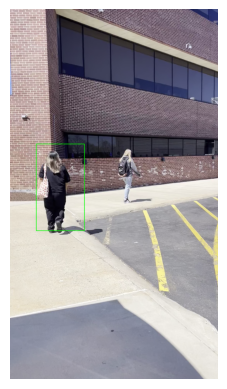

In [2]:


# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Define the initial bounding box
x, y, width, height = 136, 700, 250, 450

# Draw the bounding box on the first frame
cv2.rectangle(frame0, (x, y), (x + width, y + height), (0, 255, 0), 2)

# Convert BGR to RGB (matplotlib uses RGB)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)

# Display the first frame with the bounding box using matplotlib with Qt backend
plt.figure()
plt.imshow(frame0_rgb)
plt.axis('off')
plt.show()

# Release video capture object
cap.release()


In [3]:


# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 136, 700, 250, 450
track_window = (x, y, width, height)

# Create the region of interest (ROI)
roi = frame0[y:y+height, x:x+width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate histogram for ROI
mask = cv2.inRange(hsv_roi, np.array((0., 61., 33.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for mean shift
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate back projection
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Apply meanshift to get the new location
    ret, track_window = cv2.meanShift(dst, track_window, term_criteria)

    # Draw the tracking result
    x, y, w, h = track_window
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()
cv2.destroyAllWindows()


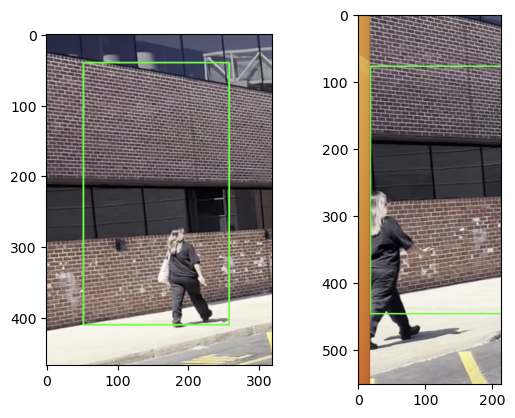

In [4]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 7.31.29 AM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 7.31.45 AM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =1)
axes[0].imshow(img1)
axes[1].imshow(img2)

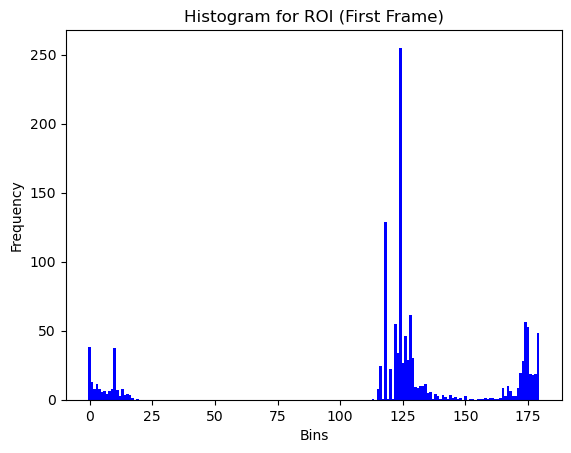

In [7]:
plt.bar(np.arange(180), roi_hist[:,0], color='blue', width=1.0)
plt.title('Histogram for ROI (First Frame)')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

FRAMES INCREASED PER SECOND

In [2]:

# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 136, 700, 250, 450
track_window = (x, y, width, height)

# Create the region of interest (ROI)
roi = frame0[y:y+height, x:x+width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate histogram for ROI
mask = cv2.inRange(hsv_roi, np.array((0., 61., 33.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for mean shift
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

# Set desired FPS (frames per second)
desired_fps = 60

# Get video width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, desired_fps, (frame_width, frame_height))

# Loop through each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate back projection
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Apply meanshift to get the new location
    ret, track_window = cv2.meanShift(dst, track_window, term_criteria)

    # Draw the tracking result
    x, y, w, h = track_window
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Write the frame to the output video
    out.write(frame)

    # Display the frame (optional)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()


ANALYSIS FOR MEAN SHIFT ON FIRST SCENARIO



**Unstable Tracking**: As the camera moves, the appearance of the object and background in successive frames changes. Mean Shift relies on finding the mode (peak) of the density distribution of colors or features within a region. With a moving camera, these density distributions may shift, causing Mean Shift to constantly readjust the tracking window. This can resulted in unstable tracking, with the bounding box continuously changing its position.

**Failure to Adapt**: Mean Shift fail to adapt to changes in object position and appearance caused by camera and object motion. It continues to track the object based on the initial appearance captured in the first frame, even as the object moves out of the initial window. This leads to inaccurate tracking results, with the bounding box remaining fixed in the same position despite the object moving.

**Limited Ability to Handle Scale Changes**: Mean Shift struggles to handle scale changes in the object caused by varying distances from the camera. If the object moves closer to or farther from the camera, the size of the object in the image changes. Mean Shift, which typically operates with a fixed-size window, is not be able to adapt to these scale changes effectively.

**Limited Robustness to Occlusions**: Mean Shift is also sensitive to occlusions, where the object is temporarily obscured by other objects or the background. If the object is partially or completely occluded, Mean Shift  loses track of the object and struggle to reacquire it once it becomes visible again.

**INCREASING VIDEO SPEED** The performance of Mean Shift doesnt change significantly.

## SCENARIO 2 -  STATIC CAMERA - MOVING OBJECT SCENARIO

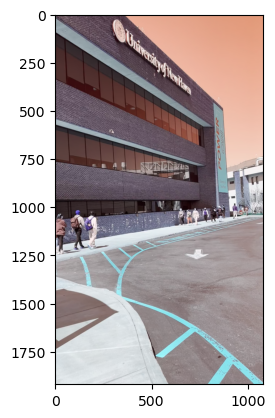

In [5]:
cap2 = cv2.VideoCapture ('/Users/brighttenkorangofori/Downloads/still_moving.mp4')
ret,frame0 = cap2.read()

plt.imshow(frame0)

## Target

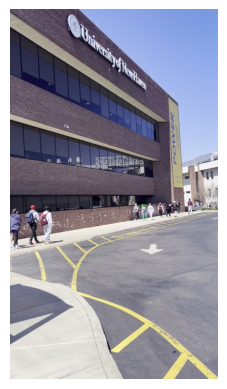

In [6]:
# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/still_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Define the initial bounding box
x, y, width, height = 682, 1014, 20, 75

# Draw the bounding box on the first frame
cv2.rectangle(frame0, (x, y), (x + width, y + height), (0, 255, 0), 2)

# Convert BGR to RGB (matplotlib uses RGB)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)

# Display the first frame with the bounding box using matplotlib with Qt backend
plt.figure()
plt.imshow(frame0_rgb)
plt.axis('off')
plt.show()

# Release video capture object
cap.release()

In [9]:


# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/still_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 682, 1014, 20, 75
track_window = (x, y, width, height)

# Create the region of interest (ROI)
roi = frame0[y:y+height, x:x+width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate histogram for ROI
mask = cv2.inRange(hsv_roi, np.array((0., 61., 33.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for mean shift
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate back projection
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Apply meanshift to get the new location
    ret, track_window = cv2.meanShift(dst, track_window, term_criteria)

    # Draw the tracking result
    x, y, w, h = track_window
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()
cv2.destroyAllWindows()

INCREASING FRAMES PER SECOND

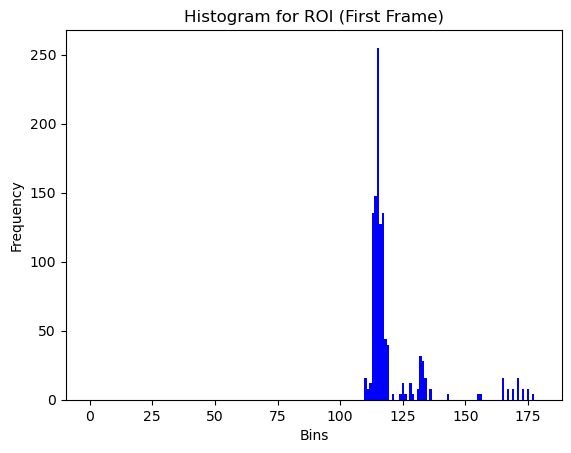

In [10]:
plt.bar(np.arange(180), roi_hist[:,0], color='blue', width=1.0)
plt.title('Histogram for ROI (First Frame)- STILL CAMERA_ MOVING OBJECT')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

## Experiments

In [42]:


# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/still_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height =  682, 1014, 30, 90
track_window = (x, y, width, height)

# Create the region of interest (ROI)
roi = frame0[y:y+height, x:x+width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate histogram for ROI
mask = cv2.inRange(hsv_roi, np.array((0., 61., 33.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for mean shift
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 80, 0.09)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate back projection
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Apply meanshift to get the new location
    ret, track_window = cv2.meanShift(dst, track_window, term_criteria)

    # Draw the tracking result
    x, y, w, h = track_window
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()
cv2.destroyAllWindows()

In this adjustment:

maxCount is set to 90, meaning the algorithm will stop after a maximum of 10 iterations.
epsilon is set to 0.09, indicating that the algorithm should stop when the centroid shift is less than 0.03.
The track_window is adjusted to be slightly larger

## Discussion

Since the camera is stationary, Mean Shift can focus solely on tracking the moving object without the additional complexity of compensating for camera motion. This simplifies the tracking task and allows Mean Shift to allocate its resources more effectively.
In this scenario, Mean Shift maintains a relatively stable bounding box around the moving object, as long as the object's appearance remains consistent and distinct from the background. This stability leads to smoother and more predictable tracking results compared to scenarios with a moving camera.
Mean Shift adapts to changes in the object's appearance caused by variations in lighting conditions or background clutter. It continuously updates the tracking window based on the current distribution of colors or features within the region of interest, allowing it to adjust to gradual changes in the object's appearance.

Ajusting parametes yielded better results as tracks better until failure due to olccusions

**LIMITATIONS**

- Limited Robustness to Occlusions: Mean Shift struggles when the moving object is temporarily occluded by other objects or the background. If the object disappears from the frame or is partially obscured, Mean Shift loses track of it and fail to reacquire it once it becomes visible again.


- Sensitivity to Object Appearance: Mean Shift relies on the density distribution of colors or features within the tracking window. If the object's appearance undergoes significant changes (e.g., due to rotations or deformations), Mean Shift  haves difficulty distinguishing the object from the background, leading to tracking failures.


- Scale Changes: Mean Shift operates with a fixed-size window, which does not adapt well to scale changes in the object caused by variations in distance from the camera. If the object moves closer to or farther from the camera, its size in the image may change, potentially affecting Mean Shift's tracking accuracy.


- Increasing video velocity: Experimenting with different frame rates gave similar result as mean shift failed at some point.

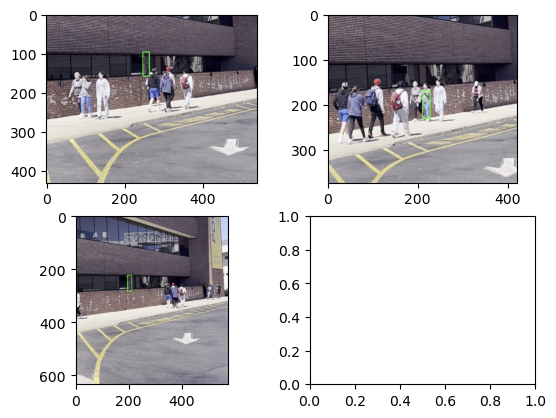

In [53]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 7.43.54 AM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 7.44.20 AM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 8.00.54 AM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)

# SCENARIO 3 MOVING CAMERA - STATIC OBJECT SCENARIO

In [4]:

# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/still_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 682, 1014, 20, 75
track_window = (x, y, width, height)

# Create the region of interest (ROI)
roi = frame0[y:y+height, x:x+width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate histogram for ROI
mask = cv2.inRange(hsv_roi, np.array((0., 61., 33.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for mean shift
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

# Set desired FPS (frames per second)
desired_fps = 100

# Get video width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, desired_fps, (frame_width, frame_height))

# Loop through each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate back projection
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Apply meanshift to get the new location
    ret, track_window = cv2.meanShift(dst, track_window, term_criteria)

    # Draw the tracking result
    x, y, w, h = track_window
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Write the frame to the output video
    out.write(frame)

    # Display the frame (optional)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()

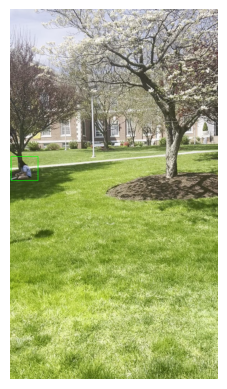

In [6]:
# Read video
import cv2
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_still.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Define the initial bounding box
x, y, width, height = 5, 765, 140, 125

# Draw the bounding box on the first frame
cv2.rectangle(frame0, (x, y), (x + width, y + height), (0, 255, 0), 2)

# Convert BGR to RGB (matplotlib uses RGB)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)

# Display the first frame with the bounding box using matplotlib with Qt backend
plt.figure()
plt.imshow(frame0_rgb)
plt.axis('off')
plt.show()

# Release video capture object
cap.release()

### EXPERIMENT varying freames /second and parameter tuning

In [47]:
# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_still.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 5, 765, 140, 125
track_window = (x, y, width, height)

# Create the region of interest (ROI)
roi = frame0[y:y+height, x:x+width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate histogram for ROI
mask = cv2.inRange(hsv_roi, np.array((0., 61., 33.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for mean shift
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

# Set desired FPS (frames per second)
desired_fps = 100

# Get video width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, desired_fps, (frame_width, frame_height))

# Loop through each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate back projection
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Apply meanshift to get the new location
    ret, track_window = cv2.meanShift(dst, track_window, term_criteria)

    # Draw the tracking result
    x, y, w, h = track_window
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Write the frame to the output video
    out.write(frame)

    # Display the frame (optional)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()

In [48]:

# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_still.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 5, 765, 140, 125
track_window = (x, y, width, height)

# Create the region of interest (ROI)
roi = frame0[y:y+height, x:x+width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate histogram for ROI
mask = cv2.inRange(hsv_roi, np.array((0., 61., 33.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for mean shift
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 15, 0.02)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate back projection
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Apply meanshift to get the new location
    ret, track_window = cv2.meanShift(dst, track_window, term_criteria)

    # Draw the tracking result
    x, y, w, h = track_window
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()
cv2.destroyAllWindows()


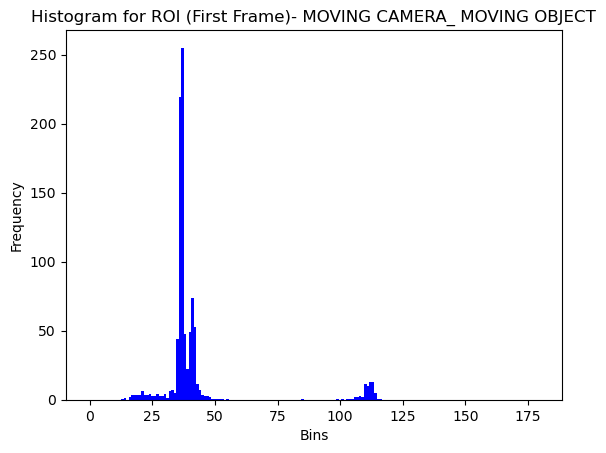

In [23]:
plt.bar(np.arange(180), roi_hist[:,0], color='blue', width=1.0)
plt.title('Histogram for ROI (First Frame)- MOVING CAMERA_ MOVING OBJECT')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

## ANALYSIS

 Mean Shift struggles to maintain stable tracking of the static object due to the continuous movement of the camera. The algorithm relies on finding the mode (peak) of the density distribution of colors or features within a region, and the changing viewpoint caused by camera motion leads to frequent adjustments in the tracking window. This can result in unstable and jittery tracking, with the bounding box constantly shifting around the object.

**Inaccurate Bounding Box:** The continuous readjustment of the tracking window based on the changing appearance of the object and background leads to inaccuracies in the estimated location of the object. The bounding box does not accurately encapsulate the entire object, leading to partial occlusions or erroneous tracking results.
The algorithm primarily relies on the initial density distribution learned from the first frame, and significant changes in the scene over time causes it to lose track of the object.

The camera undergoes changes in distance from the object, resulting in variations in the object's size in the image, Mean Shift struggles to adapt to these scale changes. The fixed-size window used by Mean Shift does not accurately capture the object at different scales, leading to inaccuracies in tracking.

Oclussion causes tracking to lose track of target in this scenerio

in Experimengts, boundiong box and criteria were adjusted but results didnt change much 

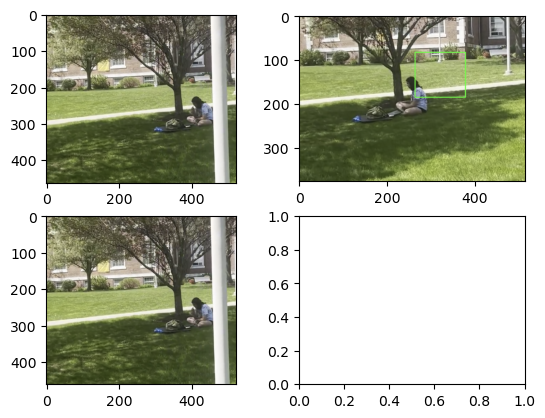

In [13]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.06.46 AM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.01.51 AM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.06.46 AM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)

# CSRT ALGORITHM

The CSRT (Channel and Spatial Reliability Tracker) algorithm is a method for object tracking in videos. It builds upon traditional Discriminative Correlation Filter (DCF) based trackers by incorporating both spatial and channel reliability.

Initialization: CSRT starts by initializing with a bounding box around the target object in the first frame.

Feature Extraction: Features are extracted from the target object within the bounding box.
Model Training: CSRT constructs a model of the target object, learning to predict its appearance in subsequent frames based on the initial frame.

Localization: In each frame, CSRT localizes the target by correlating the model with the image patch around the predicted position.

Spatial Reliability: CSRT considers the spatial consistency of responses to penalize inconsistent predictions, improving robustness to occlusions and scale changes.

Channel Reliability: It also evaluates the reliability of different color channels, aiding adaptation to lighting and color variations.

Prediction and Update: Based on the response map, CSRT predicts the new target position and updates the model iteratively.

## SCENARIO 1 - moving CAMERA _moving SCENE

In [16]:
import cv2

# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Define the desired frame rate (frames per second)
desired_fps = 100

# Calculate the delay value based on the desired frame rate
delay = int(1000 / desired_fps)

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 136, 700, 250, 450
track_window = (x, y, width, height)

# Initialize KCF tracker
tracker = cv2.TrackerKCF_create()

# Initialize the tracker with the first frame and bounding box
ok = tracker.init(frame0, track_window)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Update tracker
    ok, bbox = tracker.update(frame)

    if ok:
        # Draw bounding box
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)
    else:
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()
cv2.destroyAllWindows()


### Experiments

In [49]:


# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Define the desired frame rate (frames per second)
desired_fps = 200

# Calculate the delay value based on the desired frame rate
delay = int(1000 / desired_fps)

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 136, 700, 250, 450
track_window = (x, y, width, height)

# Initialize KCF tracker
tracker = cv2.TrackerCSRT_create()

# Initialize the tracker with the first frame and bounding box
ok = tracker.init(frame0, track_window)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Update tracker
    ok, bbox = tracker.update(frame)

    if ok:
        # Draw bounding box
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)
    else:
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()
cv2.destroyAllWindows()



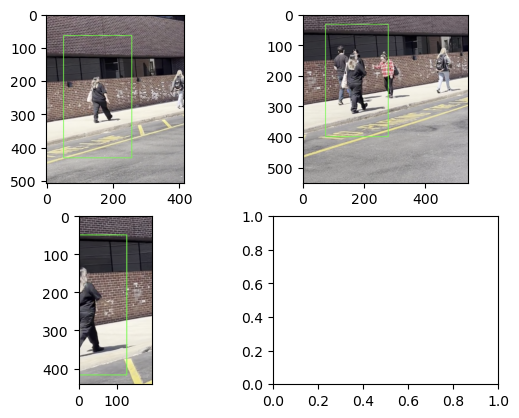

In [18]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.11.32 AM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.11.16 AM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.11.53 AM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)

### Dicsussion

In this scenario, both the camera and the object are moving. 

CSRT faces challenges:

It needs to differentiate between object motion and camera motion.
Background changes due to camera movement can be confused with object motion.

Here's how CSRT tries to handle it:

It is still able to track the object if the camera movement is relatively smooth and the object occupies a significant portion of the frame.

It readjusts the bounding box with the object at the centre.

Even if objects gets out of scene and come back to scene it is able to detect making it robust as compared to Mean Shift.

Changing FPS it still tracks object smoothly in this scenario

## SCENARIO 2 - still CAMERA _moving SCENE

In [24]:


# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/still_moving.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 682, 1014, 20, 75
track_window = (x, y, width, height)

# Initialize CSRT tracker
tracker = cv2.TrackerCSRT_create()

# Initialize the tracker with the first frame and bounding box
ok = tracker.init(frame0, track_window)

# Define desired frames per second (fps)
desired_fps = 30

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Update tracker
    ok, bbox = tracker.update(frame)

    if ok:
        # Draw bounding box
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)
    else:
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

    # Calculate delay based on desired fps
    delay = int(1000 / desired_fps)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()
cv2.destroyAllWindows()



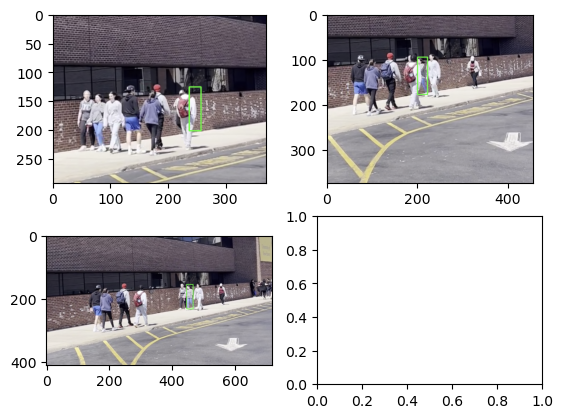

In [25]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.28.44 AM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.28.38 AM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.28.33 AM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)

 The background remains static, and the tracker can focus on the motion of the object within each frame. It works by:

Learning the appearance of the object in the initial frame based on features like color and texture.
Analyzing how these features move and change across subsequent frames.
Estimating the new position of the object in the next frame based on the learned motion patterns.

CSRT does a good tracking job until there is ovlussion where is fails to track object 
and expecially when there is an object with similar color distribution

## SCENARIO 3 - moving CAMERA _static SCENE

In [29]:
import cv2

# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_still.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region Cfor the tracking window (x, y, width, height)
x, y, width, height = 5, 765, 140, 125

# Initialize CSRT tracker
cv2.TrackerCSRT_create()



# Initialize the tracker with the first frame and bounding box
ok = tracker.init(frame0, track_window)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Update tracker
    ok, bbox = tracker.update(frame)

    if ok:
        # Draw bounding box
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)
    else:
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()

cv2.destroyAllWindows()


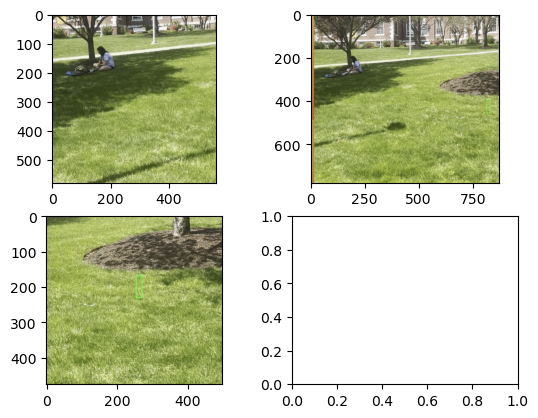

In [30]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.37.18 AM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.37.12 AM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.37.06 AM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)

incresing frames per second

In [31]:
# Read video
cap = cv2.VideoCapture('/Users/brighttenkorangofori/Downloads/moving_still.mp4')
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

# Define the desired frame rate (frames per second)
desired_fps = 400

# Calculate the delay value based on the desired frame rate
delay = int(1000 / desired_fps)

# Read the initial frame
ret, frame0 = cap.read()
if not ret:
    print("Error: Unable to read the initial frame.")
    exit()

# Set the region for the tracking window (x, y, width, height)
x, y, width, height = 136, 700, 250, 450
track_window = (x, y, width, height)

# Initialize KCF tracker
tracker = cv2.TrackerKCF_create()

# Initialize the tracker with the first frame and bounding box
ok = tracker.init(frame0, track_window)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Update tracker
    ok, bbox = tracker.update(frame)

    if ok:
        # Draw bounding box
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)
    else:
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

    # Display the frame
    cv2.imshow('Tracker', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break

# Release video capture object
cap.release()
cv2.destroyAllWindows()

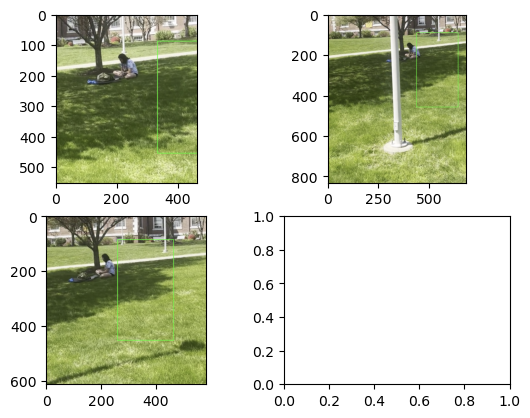

In [32]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.41.06 AM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.40.45 AM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-05-02 at 11.40.39 AM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)

### Analysis

This is the most challenging scenario for CSRT. Since the object isn't moving, there's no clear motion pattern to track. Additionally, the entire scene appears to move due to the camera motion, making it difficult to isolate the object.

CSRT  fails in this scenario.
The tracker latch onto background features that appear to move due to the camera and lose track of the actual object.

When video velocity increases the algorithm performs better although it doesnt track object accurately.

When there is oclusion it is still able to track object

## DEEP SORT ALGORITHM


Deep SORT (Simple Online and Realtime Tracking with a Deep Association Metric) is an extension of the SORT (Simple Online and Realtime Tracking) algorithm, which combines a detection model with a deep association metric to achieve robust multi-object tracking in real-time. Here's an explanation of how Deep SORT works and potential observations across different scenarios:

**How Deep SORT Works:**

Detection: Deep SORT starts by detecting objects in each frame of a video using a detection model such as YOLO or SSD. These detectors provide bounding boxes and class probabilities for each detected object.
Feature Extraction: Deep SORT extracts deep features (embeddings) from the detected objects using a neural network, typically a pre-trained convolutional neural network (CNN). These embeddings represent the appearance of each object in a high-dimensional feature space.
Data Association: Deep SORT performs data association between detections in consecutive frames to link objects across time. It employs the Hungarian algorithm or another method to assign detections to existing tracks based on the similarity between their appearance features and predicted track positions.
State Estimation: Deep SORT uses a Kalman filter to estimate the state (position and velocity) of each tracked object. The filter predicts the next state based on the previous state and updates it using new detections.
Track Management: Deep SORT maintains a list of active tracks and updates them over time. It handles track initialization, termination, and re-identification of lost tracks.
Output: The output of Deep SORT is a set of tracks, each representing the trajectory of an object across multiple frames. Each track contains information such as the object ID, bounding box coordinates, and trajectory history.

## SCENARIO 1 -  MOVING OBJECT - MOVING CAMERA SCENARIO

In [33]:
import cv2
import cvzone
import math
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

class ObjectDetection():
    def __init__(self, capture, output):
        self.capture = capture
        self.output = output  # Specify the output file path
        self.model = self.load_model()
        self.CLASS_NAMES_DICT = self.model.model.names
    
    def load_model(self):
        model = YOLO('/Users/brighttenkorangofori/Downloads/structure_from_motion/outdoor/yolov8n.pt') 
        model.fuse()
        return model
    
    def predict(self, img):
        results = self.model(img, stream=True)
        return results
    
    def plot_boxes(self, results, img): 
        detections = []
        for r in results:
            boxes = r.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h =  x2 - x1, y2 - y1
                
                # Classname
                cls = int(box.cls[0])
                currentClass = self.CLASS_NAMES_DICT[cls]
                
                # Confidence score
                conf = math.ceil(box.conf[0] * 100) / 100
                if conf > 0.5:
                    detections.append(((x1, y1, w, h), conf, currentClass))

        return detections, img   
    
    def track_detect(self, detections, img, tracker):
        tracks = tracker.update_tracks(detections, frame=img)
        for track in tracks:
            if not track.is_confirmed():
                continue
            track_id = track.track_id
            ltrb = track.to_ltrb()
            bbox = ltrb
            x1, y1, x2, y2 = bbox
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.putTextRect(img, f'ID: {track_id}', (x1, y1), scale=1, thickness=1, colorR=(0, 0, 255))
            cvzone.cornerRect(img, (x1, y1, w, h), 9, rt=1, colorR=(255, 0, 255))
        return img                            

    def _call_(self):
        cap = cv2.VideoCapture(self.capture)
        assert cap.isOpened()
        tracker = DeepSort(max_age=5,
                           n_init=2,
                           nms_max_overlap=1.0,
                           max_cosine_distance=0.3,
                           nn_budget=None,
                           override_track_class=None,
                           embedder="mobilenet",
                           half=True,
                           bgr=True,
                           embedder_gpu=True,
                           embedder_model_name=None,
                           embedder_wts=None,
                           polygon=False, 
                           today=None)
        
        # Get the video's frame width, height, and frame rate
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
        
        # Define the codec and create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(self.output, fourcc, frame_rate, (frame_width, frame_height))
        
        while True:
            ret, img = cap.read()
            if not ret:
                break
            
            results = self.predict(img)
            detections, frames = self.plot_boxes(results, img)
            detect_frame = self.track_detect(detections, img, tracker)
            out.write(detect_frame)
            
            cv2.imshow("Object Detection", detect_frame)
            if cv2.waitKey(1) == ord('q'):
                break
        
        # Release everything if job is finished
        cap.release()
        out.release()
        cv2.destroyAllWindows()

# Usage:
detector = ObjectDetection(capture='/Users/brighttenkorangofori/Downloads/moving_moving.mp4', output='output_tracking.avi')
detector._call_()



YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

0: 640x384 2 persons, 185.7ms
Speed: 7.4ms preprocess, 185.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 handbag, 204.8ms
Speed: 7.4ms preprocess, 204.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 153.2ms
Speed: 6.3ms preprocess, 153.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 177.3ms
Speed: 5.2ms preprocess, 177.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 backpack, 159.8ms
Speed: 4.4ms preprocess, 159.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 backpack, 170.1ms
Speed: 4.0ms preprocess, 170.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 183.1ms
Speed: 7.9ms preprocess, 183.1ms inference, 1.0ms postprocess per image at shap


0: 640x384 5 persons, 162.6ms
Speed: 5.4ms preprocess, 162.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 152.4ms
Speed: 4.4ms preprocess, 152.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 184.9ms
Speed: 5.3ms preprocess, 184.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 160.8ms
Speed: 5.7ms preprocess, 160.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 178.9ms
Speed: 5.2ms preprocess, 178.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 169.2ms
Speed: 4.9ms preprocess, 169.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 162.8ms
Speed: 4.9ms preprocess, 162.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 160.5ms
Speed: 4.9ms preprocess, 160.5ms inference, 1.1ms postprocess per 

Speed: 2.3ms preprocess, 177.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 198.5ms
Speed: 3.8ms preprocess, 198.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 153.4ms
Speed: 2.4ms preprocess, 153.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 151.5ms
Speed: 2.6ms preprocess, 151.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 147.1ms
Speed: 2.9ms preprocess, 147.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 150.1ms
Speed: 3.1ms preprocess, 150.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 1 backpack, 140.4ms
Speed: 2.3ms preprocess, 140.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 138.8ms
Speed: 3.2ms preprocess, 138.8ms inference, 1.0ms postprocess per image at shape (1, 


0: 640x384 4 persons, 153.6ms
Speed: 4.2ms preprocess, 153.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 154.4ms
Speed: 4.8ms preprocess, 154.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 151.2ms
Speed: 5.7ms preprocess, 151.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 144.2ms
Speed: 4.0ms preprocess, 144.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 149.5ms
Speed: 7.9ms preprocess, 149.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 154.8ms
Speed: 6.7ms preprocess, 154.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 147.8ms
Speed: 5.2ms preprocess, 147.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 177.6ms
Speed: 4.3ms preprocess, 177.6ms inference, 1.1ms postprocess per 


0: 640x384 6 persons, 1 bench, 188.2ms
Speed: 3.1ms preprocess, 188.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 1 bench, 166.7ms
Speed: 2.8ms preprocess, 166.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 174.9ms
Speed: 2.2ms preprocess, 174.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 7 persons, 152.4ms
Speed: 2.2ms preprocess, 152.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 1 bench, 175.5ms
Speed: 3.0ms preprocess, 175.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 157.8ms
Speed: 2.1ms preprocess, 157.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 145.0ms
Speed: 2.2ms preprocess, 145.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 153.1ms
Speed: 2.4ms preprocess, 153.1ms infere

Speed: 3.9ms preprocess, 139.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 147.8ms
Speed: 3.7ms preprocess, 147.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 140.4ms
Speed: 4.8ms preprocess, 140.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 143.6ms
Speed: 4.3ms preprocess, 143.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 143.5ms
Speed: 6.2ms preprocess, 143.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 153.1ms
Speed: 4.2ms preprocess, 153.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 145.6ms
Speed: 3.9ms preprocess, 145.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 150.7ms
Speed: 4.0ms preprocess, 150.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


0: 640x384 2 persons, 166.4ms
Speed: 4.7ms preprocess, 166.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 164.0ms
Speed: 5.0ms preprocess, 164.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 172.7ms
Speed: 6.1ms preprocess, 172.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 168.3ms
Speed: 5.3ms preprocess, 168.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 145.0ms
Speed: 3.8ms preprocess, 145.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 152.9ms
Speed: 5.3ms preprocess, 152.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 149.8ms
Speed: 4.2ms preprocess, 149.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 151.1ms
Speed: 4.4ms preprocess, 151.1ms inference, 0.9ms postprocess per 

### Experiments

parameters of deep dort and tuned
and video velocity increased

In [51]:
import cv2
import cvzone
import math
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

class ObjectDetection():
    def __init__(self, capture, output):
        self.capture = capture
        self.output = output  # Specify the output file path
        self.model = self.load_model()
        self.CLASS_NAMES_DICT = self.model.model.names
    
    def load_model(self):
        model = YOLO('/Users/brighttenkorangofori/Downloads/structure_from_motion/outdoor/yolov8n.pt') 
        model.fuse()
        return model
    
    def predict(self, img):
        results = self.model(img, stream=True)
        return results
    
    def plot_boxes(self, results, img): 
        detections = []
        for r in results:
            boxes = r.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h =  x2 - x1, y2 - y1
                
                # Classname
                cls = int(box.cls[0])
                currentClass = self.CLASS_NAMES_DICT[cls]
                
                # Confidence score
                conf = math.ceil(box.conf[0] * 100) / 100
                if conf > 0.5:
                    detections.append(((x1, y1, w, h), conf, currentClass))

        return detections, img   
    
    def track_detect(self, detections, img, tracker):
        tracks = tracker.update_tracks(detections, frame=img)
        for track in tracks:
            if not track.is_confirmed():
                continue
            track_id = track.track_id
            ltrb = track.to_ltrb()
            bbox = ltrb
            x1, y1, x2, y2 = bbox
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.putTextRect(img, f'ID: {track_id}', (x1, y1), scale=1, thickness=1, colorR=(0, 0, 255))
            cvzone.cornerRect(img, (x1, y1, w, h), 9, rt=1, colorR=(255, 0, 255))
        return img                            

    def _call_(self):
        cap = cv2.VideoCapture(self.capture)
        assert cap.isOpened()
        tracker = DeepSort(
    max_age=10,  # Adjust max_age based on the expected duration of object tracks
    n_init=3,    # Adjust n_init based on the minimum number of detections to confirm a track
    nms_max_overlap=0.8,  # Adjust NMS overlap threshold
    max_cosine_distance=0.2,  # Adjust the maximum cosine distance for matching detections to tracks
    embedder="mobilenet",  # Choose the feature extractor model (e.g., "mobilenet")
    half=True,  # Specify whether to use half-precision floating-point format (if supported)
    bgr=True,   # Specify whether the input images are in BGR format
    embedder_gpu=True ) # Specify whether to use GPU for embedding extraction
        
        # Get the video's frame width, height, and frame rate
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
        
        # Define the codec and create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(self.output, fourcc, frame_rate, (frame_width, frame_height))
        
        while True:
            ret, img = cap.read()
            if not ret:
                break
            
            results = self.predict(img)
            detections, frames = self.plot_boxes(results, img)
            detect_frame = self.track_detect(detections, img, tracker)
            out.write(detect_frame)
            
            cv2.imshow("Object Detection", detect_frame)
            if cv2.waitKey(1) == ord('q'):
                break
        
        # Release everything if job is finished
        cap.release()
        out.release()
        cv2.destroyAllWindows()

# Usage:
detector = ObjectDetection(capture='/Users/brighttenkorangofori/Downloads/moving_moving.mp4', output='output_tracking.avi')
detector._call_()



YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

0: 640x384 2 persons, 190.4ms
Speed: 5.0ms preprocess, 190.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 handbag, 204.9ms
Speed: 8.1ms preprocess, 204.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 219.7ms
Speed: 6.2ms preprocess, 219.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 176.1ms
Speed: 4.0ms preprocess, 176.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 backpack, 149.2ms
Speed: 4.6ms preprocess, 149.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 backpack, 151.6ms
Speed: 5.3ms preprocess, 151.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 148.8ms
Speed: 5.8ms preprocess, 148.8ms inference, 1.0ms postprocess per image at shap


0: 640x384 5 persons, 151.6ms
Speed: 4.2ms preprocess, 151.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 146.2ms
Speed: 4.3ms preprocess, 146.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 151.5ms
Speed: 3.9ms preprocess, 151.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 180.5ms
Speed: 5.4ms preprocess, 180.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 154.7ms
Speed: 4.5ms preprocess, 154.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 184.1ms
Speed: 4.8ms preprocess, 184.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 155.3ms
Speed: 5.2ms preprocess, 155.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 171.3ms
Speed: 5.4ms preprocess, 171.3ms inference, 1.0ms postprocess per 

Speed: 3.1ms preprocess, 179.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 138.1ms
Speed: 3.1ms preprocess, 138.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 173.2ms
Speed: 2.9ms preprocess, 173.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 174.1ms
Speed: 2.9ms preprocess, 174.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 163.6ms
Speed: 3.0ms preprocess, 163.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 151.1ms
Speed: 2.7ms preprocess, 151.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 1 backpack, 159.9ms
Speed: 2.6ms preprocess, 159.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 152.5ms
Speed: 3.1ms preprocess, 152.5ms inference, 1.1ms postprocess per image at shape (1, 


0: 640x384 4 persons, 153.4ms
Speed: 4.8ms preprocess, 153.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 164.2ms
Speed: 4.6ms preprocess, 164.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 164.9ms
Speed: 4.3ms preprocess, 164.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 168.9ms
Speed: 4.9ms preprocess, 168.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 145.8ms
Speed: 4.4ms preprocess, 145.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 156.9ms
Speed: 5.4ms preprocess, 156.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 165.1ms
Speed: 4.8ms preprocess, 165.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 146.7ms
Speed: 5.1ms preprocess, 146.7ms inference, 1.1ms postprocess per 


0: 640x384 6 persons, 1 bench, 152.6ms
Speed: 4.0ms preprocess, 152.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 1 bench, 163.3ms
Speed: 2.5ms preprocess, 163.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 156.1ms
Speed: 2.3ms preprocess, 156.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 7 persons, 156.4ms
Speed: 2.6ms preprocess, 156.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 1 bench, 161.3ms
Speed: 3.2ms preprocess, 161.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 159.2ms
Speed: 2.6ms preprocess, 159.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 160.3ms
Speed: 3.0ms preprocess, 160.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 156.8ms
Speed: 2.3ms preprocess, 156.8ms infere

Speed: 4.0ms preprocess, 149.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 163.3ms
Speed: 4.8ms preprocess, 163.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 162.7ms
Speed: 4.8ms preprocess, 162.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 165.2ms
Speed: 5.5ms preprocess, 165.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 164.8ms
Speed: 5.0ms preprocess, 164.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 144.8ms
Speed: 4.1ms preprocess, 144.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 162.5ms
Speed: 5.5ms preprocess, 162.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 190.1ms
Speed: 5.5ms preprocess, 190.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 384)


0: 640x384 2 persons, 144.7ms
Speed: 5.1ms preprocess, 144.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 147.1ms
Speed: 5.0ms preprocess, 147.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 169.7ms
Speed: 5.7ms preprocess, 169.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 170.5ms
Speed: 4.4ms preprocess, 170.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 173.0ms
Speed: 5.6ms preprocess, 173.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 178.2ms
Speed: 4.5ms preprocess, 178.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 173.4ms
Speed: 6.4ms preprocess, 173.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 236.8ms
Speed: 5.3ms preprocess, 236.8ms inference, 0.9ms postprocess per 

### Analysis

 Deep SORT excels in tracking moving objects even with a moving camera. It accurately associates detections across frames, maintaining smooth and consistent tracks for dynamically moving objects.

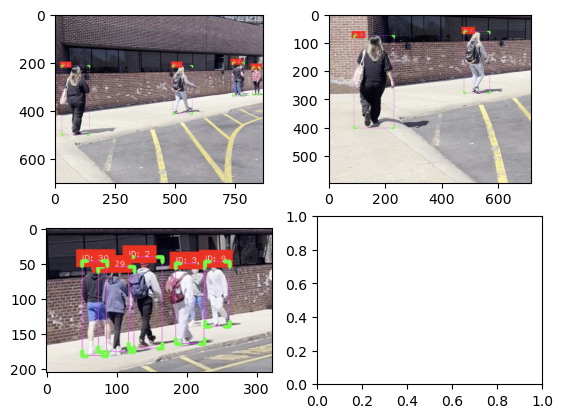

In [2]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.14.12 PM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.13.53 PM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.04.54 PM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)

# STILL CAMERA - MOVING OBJECT SCENARIO

In [ ]:
import cv2
import cvzone
import math
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

class ObjectDetection():
    def __init__(self, capture, output):
        self.capture = capture
        self.output = output  # Specify the output file path
        self.model = self.load_model()
        self.CLASS_NAMES_DICT = self.model.model.names
    
    def load_model(self):
        model = YOLO('/Users/brighttenkorangofori/Downloads/structure_from_motion/outdoor/yolov8n.pt') 
        model.fuse()
        return model
    
    def predict(self, img):
        results = self.model(img, stream=True)
        return results
    
    def plot_boxes(self, results, img): 
        detections = []
        for r in results:
            boxes = r.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h =  x2 - x1, y2 - y1
                
                # Classname
                cls = int(box.cls[0])
                currentClass = self.CLASS_NAMES_DICT[cls]
                
                # Confidence score
                conf = math.ceil(box.conf[0] * 100) / 100
                if conf > 0.5:
                    detections.append(((x1, y1, w, h), conf, currentClass))

        return detections, img   
    
    def track_detect(self, detections, img, tracker):
        tracks = tracker.update_tracks(detections, frame=img)
        for track in tracks:
            if not track.is_confirmed():
                continue
            track_id = track.track_id
            ltrb = track.to_ltrb()
            bbox = ltrb
            x1, y1, x2, y2 = bbox
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.putTextRect(img, f'ID: {track_id}', (x1, y1), scale=1, thickness=1, colorR=(0, 0, 255))
            cvzone.cornerRect(img, (x1, y1, w, h), 9, rt=1, colorR=(255, 0, 255))
        return img                            

    def _call_(self):
        cap = cv2.VideoCapture(self.capture)
        assert cap.isOpened()
        tracker = DeepSort(max_age=5,
                           n_init=2,
                           nms_max_overlap=1.0,
                           max_cosine_distance=0.3,
                           nn_budget=None,
                           override_track_class=None,
                           embedder="mobilenet",
                           half=True,
                           bgr=True,
                           embedder_gpu=True,
                           embedder_model_name=None,
                           embedder_wts=None,
                           polygon=False, 
                           today=None)
        
        # Get the video's frame width, height, and frame rate
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
        
        # Define the codec and create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(self.output, fourcc, frame_rate, (frame_width, frame_height))
        
        while True:
            ret, img = cap.read()
            if not ret:
                break
            
            results = self.predict(img)
            detections, frames = self.plot_boxes(results, img)
            detect_frame = self.track_detect(detections, img, tracker)
            out.write(detect_frame)
            
            cv2.imshow("Object Detection", detect_frame)
            if cv2.waitKey(1) == ord('q'):
                break
        
        # Release everything if job is finished
        cap.release()
        out.release()
        cv2.destroyAllWindows()

# Usage:
detector = ObjectDetection(capture='/Users/brighttenkorangofori/Downloads/still_moving.mp4', output='output_tracking.avi')
detector._call_()



YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

0: 640x384 8 persons, 196.3ms
Speed: 6.2ms preprocess, 196.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 persons, 208.6ms
Speed: 5.0ms preprocess, 208.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 persons, 170.8ms
Speed: 5.3ms preprocess, 170.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 persons, 244.7ms
Speed: 4.7ms preprocess, 244.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 persons, 182.5ms
Speed: 4.9ms preprocess, 182.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 184.6ms
Speed: 4.8ms preprocess, 184.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 persons, 168.9ms
Speed: 7.6ms preprocess, 168.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 


0: 640x384 9 persons, 157.7ms
Speed: 5.4ms preprocess, 157.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 persons, 161.1ms
Speed: 5.0ms preprocess, 161.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 persons, 155.8ms
Speed: 4.3ms preprocess, 155.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 12 persons, 155.5ms
Speed: 4.3ms preprocess, 155.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 persons, 154.1ms
Speed: 4.3ms preprocess, 154.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 12 persons, 152.5ms
Speed: 5.4ms preprocess, 152.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 12 persons, 152.7ms
Speed: 4.1ms preprocess, 152.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 persons, 155.4ms
Speed: 3.3ms preprocess, 155.4ms inference, 1.0ms postproce


0: 640x384 9 persons, 153.1ms
Speed: 2.4ms preprocess, 153.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 persons, 143.5ms
Speed: 2.5ms preprocess, 143.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 persons, 147.3ms
Speed: 2.9ms preprocess, 147.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 12 persons, 144.5ms
Speed: 2.5ms preprocess, 144.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 12 persons, 147.6ms
Speed: 2.6ms preprocess, 147.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 persons, 150.5ms
Speed: 2.3ms preprocess, 150.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 persons, 159.2ms
Speed: 2.7ms preprocess, 159.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 persons, 160.5ms
Speed: 3.5ms preprocess, 160.5ms inference, 1.0ms postproces


0: 640x384 10 persons, 175.0ms
Speed: 3.3ms preprocess, 175.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 persons, 156.4ms
Speed: 5.4ms preprocess, 156.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 151.7ms
Speed: 3.1ms preprocess, 151.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 152.8ms
Speed: 3.0ms preprocess, 152.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 171.7ms
Speed: 5.6ms preprocess, 171.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 persons, 167.3ms
Speed: 4.8ms preprocess, 167.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 272.5ms
Speed: 5.2ms preprocess, 272.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 149.6ms
Speed: 2.6ms preprocess, 149.6ms inference, 1.0ms postprocess 


0: 640x384 10 persons, 155.1ms
Speed: 4.0ms preprocess, 155.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 150.6ms
Speed: 4.2ms preprocess, 150.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 156.2ms
Speed: 3.9ms preprocess, 156.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 persons, 152.9ms
Speed: 4.4ms preprocess, 152.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 13 persons, 151.6ms
Speed: 4.1ms preprocess, 151.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 12 persons, 151.7ms
Speed: 4.2ms preprocess, 151.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 155.4ms
Speed: 4.4ms preprocess, 155.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 persons, 152.3ms
Speed: 4.9ms preprocess, 152.3ms inference, 1.0ms postproce

### Experiment doubling frame rate and adjusting parameters

In [ ]:

import cvzone
import math
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

class ObjectDetection():
    def __init__(self, capture, output):
        self.capture = capture
        self.output = output  # Specify the output file path
        self.model = self.load_model()
        self.CLASS_NAMES_DICT = self.model.model.names
    
    def load_model(self):
        model = YOLO('/Users/brighttenkorangofori/Downloads/structure_from_motion/outdoor/yolov8n.pt') 
        model.fuse()
        return model
    
    def predict(self, img):
        results = self.model(img, stream=True)
        return results
    
    def plot_boxes(self, results, img): 
        detections = []
        for r in results:
            boxes = r.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h =  x2 - x1, y2 - y1
                
                # Classname
                cls = int(box.cls[0])
                currentClass = self.CLASS_NAMES_DICT[cls]
                
                # Confidence score
                conf = math.ceil(box.conf[0] * 100) / 100
                if conf > 0.5:
                    detections.append(((x1, y1, w, h), conf, currentClass))

        return detections, img   
    
    def track_detect(self, detections, img, tracker):
        tracks = tracker.update_tracks(detections, frame=img)
        for track in tracks:
            if not track.is_confirmed():
                continue
            track_id = track.track_id
            ltrb = track.to_ltrb()
            bbox = ltrb
            x1, y1, x2, y2 = bbox
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.putTextRect(img, f'ID: {track_id}', (x1, y1), scale=1, thickness=1, colorR=(0, 0, 255))
            cvzone.cornerRect(img, (x1, y1, w, h), 9, rt=1, colorR=(255, 0, 255))
        return img                            

    def _call_(self):
        cap = cv2.VideoCapture(self.capture)
        assert cap.isOpened()
        tracker = DeepSort(max_age=10,
                           n_init=4,
                           nms_max_overlap=2.0,
                           max_cosine_distance=0.8,
                           nn_budget=None,
                           override_track_class=None,
                           embedder="mobilenet",
                           half=True,
                           bgr=True,
                           embedder_gpu=True,
                           embedder_model_name=None,
                           embedder_wts=None,
                           polygon=False, 
                           today=None)
        
        # Get the video's frame width, height, and frame rate
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
        
        # Define the codec and create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(self.output, fourcc, frame_rate*2, (frame_width, frame_height))
        
        while True:
            ret, img = cap.read()
            if not ret:
                break
            
            results = self.predict(img)
            detections, frames = self.plot_boxes(results, img)
            detect_frame = self.track_detect(detections, img, tracker)
            out.write(detect_frame)
            
            cv2.imshow("Object Detection", detect_frame)
            if cv2.waitKey(1) == ord('q'):
                break
        
        # Release everything if job is finished
        cap.release()
        out.release()
        cv2.destroyAllWindows()

# Usage:
detector = ObjectDetection(capture='/Users/brighttenkorangofori/Downloads/still_moving.mp4', output='output_tracking.avi')
detector._call_()



### Experiments

In [ ]:
import cv2
import cvzone
import math
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

class ObjectDetection():
    def __init__(self, capture, output):
        self.capture = capture
        self.output = output  # Specify the output file path
        self.model = self.load_model()
        self.CLASS_NAMES_DICT = self.model.model.names
    
    def load_model(self):
        model = YOLO('/Users/brighttenkorangofori/Downloads/structure_from_motion/outdoor/yolov8n.pt') 
        model.fuse()
        return model
    
    def predict(self, img):
        results = self.model(img, stream=True)
        return results
    
    def plot_boxes(self, results, img): 
        detections = []
        for r in results:
            boxes = r.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h =  x2 - x1, y2 - y1
                
                # Classname
                cls = int(box.cls[0])
                currentClass = self.CLASS_NAMES_DICT[cls]
                
                # Confidence score
                conf = math.ceil(box.conf[0] * 100) / 100
                if conf > 0.5:
                    detections.append(((x1, y1, w, h), conf, currentClass))

        return detections, img   
    
    def track_detect(self, detections, img, tracker):
        tracks = tracker.update_tracks(detections, frame=img)
        for track in tracks:
            if not track.is_confirmed():
                continue
            track_id = track.track_id
            ltrb = track.to_ltrb()
            bbox = ltrb
            x1, y1, x2, y2 = bbox
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.putTextRect(img, f'ID: {track_id}', (x1, y1), scale=1, thickness=1, colorR=(0, 0, 255))
            cvzone.cornerRect(img, (x1, y1, w, h), 9, rt=1, colorR=(255, 0, 255))
        return img                            

    def _call_(self):
        cap = cv2.VideoCapture(self.capture)
        assert cap.isOpened()
        tracker = DeepSort(max_age=4,
                           n_init=8,
                           nms_max_overlap=8.0,
                           max_cosine_distance=1,
                           nn_budget=None,
                           override_track_class=None,
                           embedder="mobilenet",
                           half=True,
                           bgr=True,
                           embedder_gpu=True,
                           embedder_model_name=None,
                           embedder_wts=None,
                           polygon=False, 
                           today=None)
        
        # Get the video's frame width, height, and frame rate
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
        
        # Define the codec and create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(self.output, fourcc, frame_rate*2, (frame_width, frame_height))
        
        while True:
            ret, img = cap.read()
            if not ret:
                break
            
            results = self.predict(img)
            detections, frames = self.plot_boxes(results, img)
            detect_frame = self.track_detect(detections, img, tracker)
            out.write(detect_frame)
            
            cv2.imshow("Object Detection", detect_frame)
            if cv2.waitKey(1) == ord('q'):
                break
        
        # Release everything if job is finished
        cap.release()
        out.release()
        cv2.destroyAllWindows()

# Usage:
detector = ObjectDetection(capture='/Users/brighttenkorangofori/Downloads/still_moving.mp4', output='output_tracking.avi')
detector._call_()



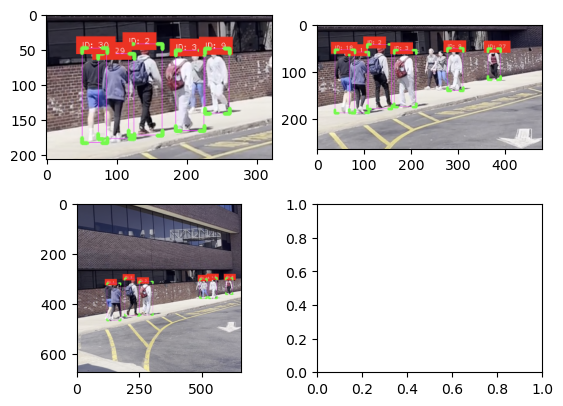

In [5]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.04.54 PM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.04.40 PM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.03.50 PM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)


Deep SORT excels in tracking moving objects even with a moving camer with varying speed. It accurately associates detections across frames, maintaining smooth and consistent tracks for dynamically moving objects.Even though the detector doesnt do a good job of identifying all targets. All detected targets are tracked well.

## MOVING CAMERA - STILL OBJECT SCENARIO

In [1]:
import cv2
import cvzone
import math
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

class ObjectDetection():
    def __init__(self, capture, output):
        self.capture = capture
        self.output = output  # Specify the output file path
        self.model = self.load_model()
        self.CLASS_NAMES_DICT = self.model.model.names
    
    def load_model(self):
        model = YOLO('/Users/brighttenkorangofori/Downloads/structure_from_motion/outdoor/yolov8n.pt') 
        model.fuse()
        return model
    
    def predict(self, img):
        results = self.model(img, stream=True)
        return results
    
    def plot_boxes(self, results, img): 
        detections = []
        for r in results:
            boxes = r.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h =  x2 - x1, y2 - y1
                
                # Classname
                cls = int(box.cls[0])
                currentClass = self.CLASS_NAMES_DICT[cls]
                
                # Confidence score
                conf = math.ceil(box.conf[0] * 100) / 100
                if conf > 0.5:
                    detections.append(((x1, y1, w, h), conf, currentClass))

        return detections, img   
    
    def track_detect(self, detections, img, tracker):
        tracks = tracker.update_tracks(detections, frame=img)
        for track in tracks:
            if not track.is_confirmed():
                continue
            track_id = track.track_id
            ltrb = track.to_ltrb()
            bbox = ltrb
            x1, y1, x2, y2 = bbox
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.putTextRect(img, f'ID: {track_id}', (x1, y1), scale=1, thickness=1, colorR=(0, 0, 255))
            cvzone.cornerRect(img, (x1, y1, w, h), 9, rt=1, colorR=(255, 0, 255))
        return img                            

    def _call_(self):
        cap = cv2.VideoCapture(self.capture)
        assert cap.isOpened()
        tracker = DeepSort(max_age=5,
                           n_init=2,
                           nms_max_overlap=1.0,
                           max_cosine_distance=0.3,
                           nn_budget=None,
                           override_track_class=None,
                           embedder="mobilenet",
                           half=True,
                           bgr=True,
                           embedder_gpu=True,
                           embedder_model_name=None,
                           embedder_wts=None,
                           polygon=False, 
                           today=None)
        
        # Get the video's frame width, height, and frame rate
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
        
        # Define the codec and create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(self.output, fourcc, frame_rate, (frame_width, frame_height))
        
        while True:
            ret, img = cap.read()
            if not ret:
                break
            
            results = self.predict(img)
            detections, frames = self.plot_boxes(results, img)
            detect_frame = self.track_detect(detections, img, tracker)
            out.write(detect_frame)
            
            cv2.imshow("Object Detection", detect_frame)
            if cv2.waitKey(1) == ord('q'):
                break
        
        # Release everything if job is finished
        cap.release()
        out.release()
        cv2.destroyAllWindows()

# Usage:
detector = ObjectDetection(capture='/Users/brighttenkorangofori/Downloads/IMG_0256.MOV', output='output_tracking.avi')
detector._call_()



YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

0: 640x384 1 person, 282.2ms
Speed: 7.5ms preprocess, 282.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 177.8ms
Speed: 4.6ms preprocess, 177.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 158.5ms
Speed: 2.3ms preprocess, 158.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 149.4ms
Speed: 2.9ms preprocess, 149.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 148.1ms
Speed: 2.7ms preprocess, 148.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 147.9ms
Speed: 2.5ms preprocess, 147.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 141.8ms
Speed: 2.5ms preprocess, 141.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 


0: 640x384 1 person, 151.2ms
Speed: 2.6ms preprocess, 151.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 140.2ms
Speed: 2.3ms preprocess, 140.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 142.8ms
Speed: 2.0ms preprocess, 142.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 147.9ms
Speed: 2.8ms preprocess, 147.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 148.4ms
Speed: 3.0ms preprocess, 148.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 149.4ms
Speed: 2.4ms preprocess, 149.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 150.3ms
Speed: 2.5ms preprocess, 150.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 148.9ms
Speed: 2.7ms preprocess, 148.9ms inference, 1.1ms postprocess per image 

0: 640x384 2 persons, 146.4ms
Speed: 2.8ms preprocess, 146.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 148.2ms
Speed: 3.1ms preprocess, 148.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 car, 151.0ms
Speed: 2.6ms preprocess, 151.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 153.8ms
Speed: 2.7ms preprocess, 153.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 149.1ms
Speed: 2.4ms preprocess, 149.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 150.8ms
Speed: 3.0ms preprocess, 150.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 147.9ms
Speed: 2.5ms preprocess, 147.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 153.4ms
Speed: 2.7ms preprocess, 153.4ms inference


0: 640x384 1 person, 150.8ms
Speed: 2.5ms preprocess, 150.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 147.0ms
Speed: 2.6ms preprocess, 147.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 149.1ms
Speed: 2.6ms preprocess, 149.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 149.2ms
Speed: 3.0ms preprocess, 149.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 149.8ms
Speed: 2.4ms preprocess, 149.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 148.9ms
Speed: 2.6ms preprocess, 148.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 161.0ms
Speed: 3.7ms preprocess, 161.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 148.8ms
Speed: 2.9ms preprocess, 148.8ms inference, 1.0ms postproces

Speed: 3.0ms preprocess, 149.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 149.1ms
Speed: 2.4ms preprocess, 149.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 146.4ms
Speed: 2.7ms preprocess, 146.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 car, 152.0ms
Speed: 3.0ms preprocess, 152.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 149.4ms
Speed: 2.7ms preprocess, 149.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 151.4ms
Speed: 3.2ms preprocess, 151.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 173.0ms
Speed: 3.2ms preprocess, 173.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 164.4ms
Speed: 3.0ms preprocess, 164.4ms inference, 1.3ms post


0: 640x384 1 person, 1 car, 182.8ms
Speed: 3.6ms preprocess, 182.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 2 cars, 203.4ms
Speed: 2.7ms preprocess, 203.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 151.5ms
Speed: 3.1ms preprocess, 151.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 160.4ms
Speed: 2.9ms preprocess, 160.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 156.8ms
Speed: 2.4ms preprocess, 156.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 165.3ms
Speed: 2.8ms preprocess, 165.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 165.9ms
Speed: 2.8ms preprocess, 165.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 1 car, 201.9ms
Speed: 3.9ms prep

### Analysis 

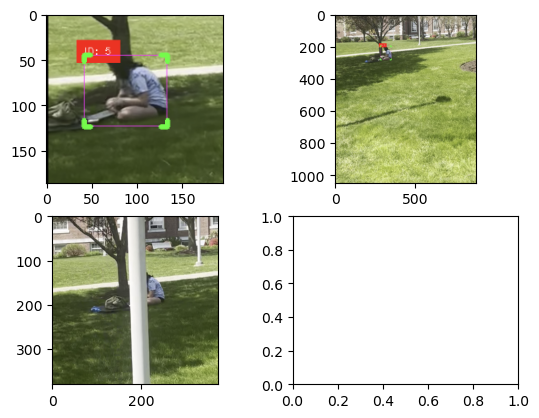

In [6]:
img1 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.07.28 PM.png')
img2 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.07.49 PM.png')
img3 = plt.imread('/Users/brighttenkorangofori/Desktop/Screenshot 2024-04-29 at 2.08.13 PM.png')
fix,axes = plt.subplots(ncols = 2 , nrows =2)
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)

Deep SORT initially detects the still object when it's visible in the camera's field of view. It creates a track for the object and begins associating subsequent detections with this track.
 When the camera's movement causes the object to become occluded by other objects or obstacles in the scene, Deep SORT temporarily lose track of the object. This is because the object is no longer visible to the detector, and there are no new detections to associate with the existing track.
As the camera continues to move, the occluding objects  moves out of the way, allowing the still object to become visible again. When this happens, Deep SORT reacquires the object and resume tracking by associating the newly detected object with the existing track.


## Conclusion

- Mean Shift 

Performs comparatively  well in moving camera - moving object scenario  but performs poorly in other scenarios due to factors such as oclusion. Parameter tuning such as probImage, window, criteria plays a significant role in tracker performance.

- CSRT (Channel-wise Spatial Reliability Transform):

Strengths:
Performs well in scenarios with a still camera and moving object.
Relatively fast and efficient.
Easy to implement.
Weaknesses:
Struggles with camera motion, especially if erratic.
Can be fooled by background changes.
Relies on good initial object definition.
Its also does Fairly well with oclusions.

Although cv.CSRT doesnt give parameter tuning in its API asjusting window size helps improve tracker performance.

- DeepSORT (Simple Online and Realtime Tracking with a Deep Appearance Association Metric):

Strengths:
Handles camera motion better than CSRT due to its use of deep learning for appearance modeling.
Can associate detections across frames even with occlusions or temporary disappearances.
More robust to background clutter.
Weaknesses:
More computationally expensive than CSRT.
Requires training a deep learning model, which can be time-consuming and resource-intensive.
Might be overkill for simple tracking tasks.
Mean Shift:

Strengths:
Fast and efficient.
Good for tracking objects with a well-defined color histogram.
Weaknesses:
Prone to getting stuck in local minima (losing track) with complex backgrounds or cluttered scenes.
Struggles with objects undergoing significant shape changes.
Not ideal for scenarios with camera motion.
General Observations:

The choice of tracker depends on the specific application and video characteristics.
CSRT is a good starting point for simple tracking tasks with minimal camera motion.
DeepSORT offers superior performance with camera motion and background clutter but requires more resources and setup.
Mean Shift can be a good choice for fast tracking of well-defined color objects in static scenes.


Object size and appearance: DeepSORT and Mean Shift might perform better with larger objects with distinct features.
Real-time vs. offline processing: CSRT and Mean Shift are generally faster, making them suitable for real-time applications.
Computational resources: DeepSORT requires more processing power compared to CSRT and Mean Shift.
By understanding the strengths and weaknesses of each tracker, you can make an informed decision about which one is best suited for your specific object tracking needs.

There's always a trade-off between speed and accuracy. Reducing resolution or confidence threshold might lead to missed detections or inaccurate bounding boxes.
